In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.ticker as mticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [2]:
fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Dec-08-2019.csv'
# saveMergeFilePath = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb'

In [3]:
df = pd.read_csv(fileLocation)

In [4]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red',linestyle='solid')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



# Number of movies produced over the years

In [5]:
# Dataframe without duplicate movies
withoutDuplicateMovieDF = df.drop_duplicates(subset=['movie_id'], keep=False)

# Year wise count of movies 
YearWiseCountOfMovies = withoutDuplicateMovieDF.movie_year.value_counts()

In [6]:
type(YearWiseCountOfMovies)

pandas.core.series.Series

In [7]:
# Testing Draw Plot - Version 1

def plot_MoviesReleasedOverTheYears(df, x, y, title="", xlabel='Movie released year', ylabel='Number of Movies', dpi=100):
    #plt.figure(figsize=(12,5))
    fig, ax = plt.subplots()
    plt.xlabel('Movie released year')
    plt.ylabel('Number of Movies')
    #ax.plot(x, y, color='tab:red',linestyle='solid')
#     ax = plt.axes([0, 0, 3, 0.5])
    plt.autoscale(enable=True)
    ax.plot(x, y)
    ax.set_xlim(1880,2020)
    ax.set_ylim(-1000,25000)
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(4))
    ax.yaxis.set_major_locator(MultipleLocator(5000))
    ax.yaxis.set_minor_locator(MultipleLocator(1000))
#     ax.xaxis.set_minor_locator(AutoMinorLocator())
#     ax.tick_params(which='both', width=2)
#     ax.tick_params(which='major', length=5)
#     ax.tick_params(which='minor', length=5, color='r')
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    # Show ticks outwards
    ax.tick_params(which = 'both', direction = 'out', color ='r')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    h1, l1 = ax.get_legend_handles_labels()
    #plt.grid(which = 'both', linestyle='--', linewidth=1)
    ax.legend(['Movies released trend'])
    plt.savefig("hello.jpg") 
    plt.show()



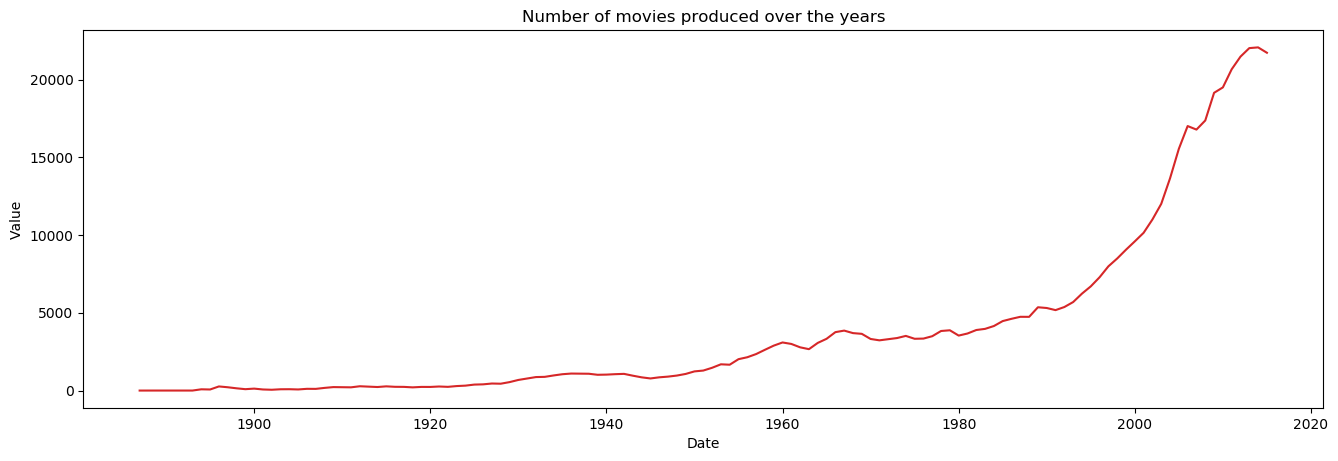

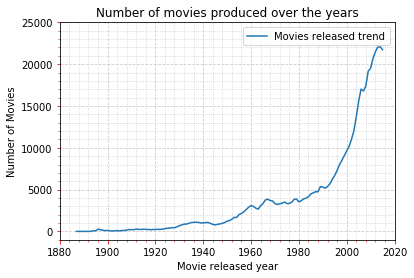

In [8]:
# Number of movies produced over the years by both the gender

yearDF = pd.DataFrame({'Year':YearWiseCountOfMovies.index,'Count':YearWiseCountOfMovies.values})
yearDF = yearDF.sort_values(by ='Year')
yearDF = yearDF.reset_index(drop=True)
yearDF = yearDF[yearDF.Year <= 2015]
plot_df(yearDF, x=yearDF.Year, y=yearDF.Count, title='Number of movies produced over the years')
plot_MoviesReleasedOverTheYears(yearDF, x=yearDF.Year, y=yearDF.Count, title='Number of movies produced over the years',xlabel= 'Movie released year', ylabel = 'Number of Movies')

# Exponential Curve Fit

In [9]:
import scipy
from scipy.optimize import curve_fit
import sympy as sym

In [10]:
x = np.array(yearDF.Year)
y = np.array(yearDF.Count)

In [11]:
# Convert to float

x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

a = 0.03864417066814921 , b = -223.9772619459813, c = 432693.71857117594, d = -278620154.7019416


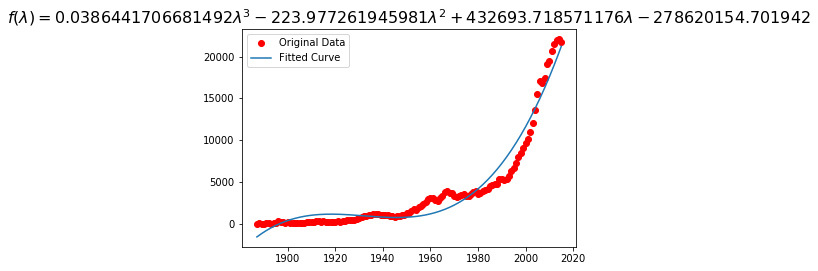

In [12]:
plt.plot(x, y, 'ro',label="Original Data")

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

# def func(x, a, b, c):
#     return a*np.exp(b*x)+c  

popt, pcov = curve_fit(func, x, y)

print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

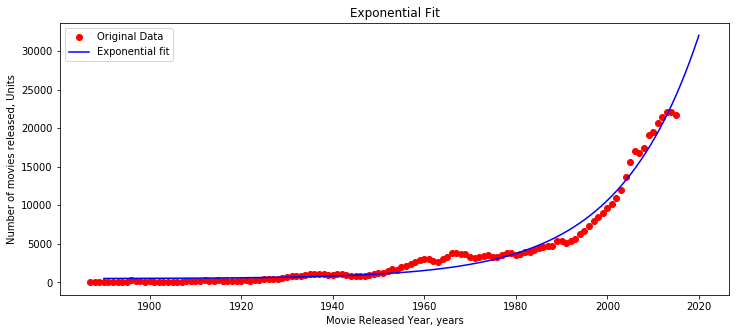

In [13]:
plt.figure(figsize=(12,5))
plt.plot(x,y,'ro',label="Original Data")
# y = AeBx 
def exponenial_func(x, a, b, c):
    return a*np.exp(b*x)+c  

popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1),maxfev=20000)

xx = np.linspace(1890, 2020, 1000)
yy = exponenial_func(xx, *popt)

plt.plot(xx,yy,'b-',label="Exponential fit")
plt.title('Exponential Fit')
plt.xlabel('Movie Released Year, years')
plt.ylabel('Number of movies released, Units')
plt.legend(loc='upper left')


In [14]:
# Fit for the exponentail curve

residuals = y- exponenial_func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)

r_squared = 1 - (ss_res / ss_tot)



In [15]:
def howGoodIsMyExponentialFit():
    residuals = y- exponenial_func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [16]:
r_squared_value = howGoodIsMyExponentialFit()
print("The r^2 value is : ",str(r_squared),"which translates that the model explains",str(round((r_squared * 100),2)),"% of the variability in the response data around its mean.")

The r^2 value is :  0.9782948465581737 which translates that the model explains 97.83 % of the variability in the response data around its mean.


In [17]:
def howGoodIsMyLinearFit(x,y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    if(p_value<0.05):
        print("The p-value : ",str(p_value)," is a good fit (less than 0.05)\n")
    else:
        print("The p-value : ",str(p_value)," is a bad fit")
    print("The r^2 value is : ",str(r_value**2)," which represents that the model explains",str(round((r_value**2 * 100),2)),"% of the variability in the response data around its mean.")
    return

In [18]:
howGoodIsMyLinearFit(x,y)

The p-value :  1.2354447059185217e-28  is a good fit (less than 0.05)

The r^2 value is :  0.6223977767107329  which represents that the model explains 62.24 % of the variability in the response data around its mean.


# Number of movies produced by Female and Male directors

In [19]:
# Copy data frame for Plotting Male Female Year graph 

dfMaleFemaleYear= df.copy()

# Add a dummy column to act as count
dfMaleFemaleYear['dummy'] = 1

# Generate a pivot table for count of Female and male year wise
pivotMaleFemaleYear = pd.pivot_table(dfMaleFemaleYear, values='dummy', index=['Gender'],columns=['movie_year'], aggfunc=np.sum, fill_value=0)

In [20]:
pivotMaleFemaleYear = pivotMaleFemaleYear.sort_values(by='Gender',ascending=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


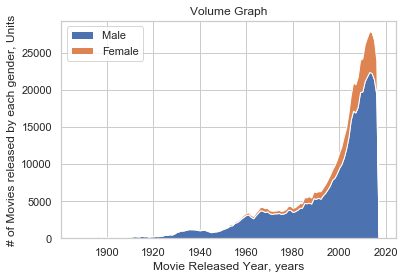

In [43]:
# Plot Number of movies by Female and Male directors

# https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py

x = list(pivotMaleFemaleYear)
# y = np.vstack([y1, y2])
y = pivotMaleFemaleYear.to_numpy()
labelsGender = ["Male ", "Female"]

fig, ax = plt.subplots()
ax.stackplot(x, y, labels=labelsGender)
ax.legend(loc='upper left')
plt.title('Volume Graph')
plt.xlabel(r'Movie Released Year, years')
plt.ylabel(r'# of Movies released by each gender, Units')
plt.savefig("hello.eps")
plt.show()

In [22]:
df

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male


# Plot - Movies produced by Male and Female

In [23]:
df["Gender"].value_counts().index

Index(['Male', 'Female'], dtype='object')

In [24]:
df

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male


In [39]:
def plot_male_female_movies_produced(dataFrame):
    # Total movies produced by Men VS Women 
    df = dataFrame
    fig, ax1 = plt.subplots(figsize=(10,6))
    #plt.figure(figsize=(16, 8))
    sns.set_context("poster", rc={"grid.linewidth": 5})
    sns.set(style="whitegrid")
    #sns.set(font_scale=5) 
    ncount = len(df)
    sns_plot = sns.countplot(x='Gender', hue="Gender" ,data = df)
    sns_plot.set_xlabel('Gender',fontsize=25)
    sns_plot.set_ylabel('Number of Movies',fontsize=25)
    plt.setp(sns_plot.get_legend().get_texts(), fontsize='20') # for legend text
    plt.setp(sns_plot.get_legend().get_title(), fontsize='25') # for legend title
    ylabels = ['{:,.0f}'.format(x) + 'K' for x in sns_plot.get_yticks()/1000]
    sns_plot.set_yticklabels(ylabels,fontsize = 18)
    sns_plot.set_xticklabels(['Male','Female'],fontsize = 18)
    
    # Change minor ticks to show every 10/5 units and 0.5/2 units
    
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

    # Turn grid on for both major and minor ticks and style minor slightly differently.
    
    #ax1.grid(which='minor', color='#CCCCCC', linestyle=':')

    
#     for p in sns_plot.patches:
#         sns_plot.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),ha='center',va='right')



    fig = sns_plot.get_figure()
    fig.savefig("male_female_movies.eps") 
    plt.show()

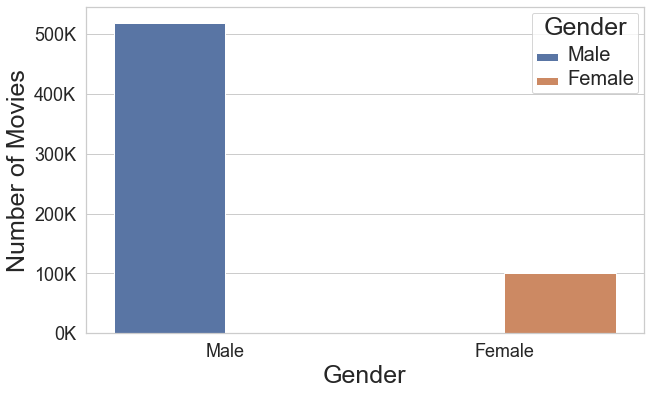

In [40]:
plot_male_female_movies_produced(df)

# Example plots

In [27]:
# # Import Data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# df.reset_index(inplace=True)

# # Prepare data
# df['year'] = [x.year for x in df.date]
# df['month'] = [x.strftime('%b') for x in df.date]
# years = df['year'].unique()

# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16,12), dpi= 80)
# for i, y in enumerate(years):
#     if i > 0:        
#         plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
#         plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
# plt.show()

In [28]:
# # Prepare data
# newdf['year'] = [d.year for d in newdf.date_published]
# newdf['month'] = [d.strftime('%b') for d in newdf.date_published]
# years = newdf['year'].unique()

In [29]:
# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16,12), dpi= 80)
# for i, y in enumerate(years):
#     if i > 0:        
#         plt.plot('month', 'value', data=newdf.loc[df.year==y, :], color=mycolors[i], label=y)
#         plt.text(df.loc[newdf.year==y, :].shape[0]-.9, newdf.loc[newdf.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Unsure$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot", fontsize=20)
# plt.show()